# Λύσεις άσκησης 9

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [2]:
boston_set = datasets.load_boston()

boston_df = pd.DataFrame(boston_set.data, columns=boston_set.feature_names)

boston_df['PRICE'] = pd.Series(boston_set.target)  

boston_df.head()

X = boston_df.drop(columns = 'PRICE')
y = boston_df['PRICE'].values.reshape(-1, 1)

labels = boston_df.columns.values[:-1].tolist()

## Linear Regression 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

scaler_features = StandardScaler(copy=True, with_mean=True, with_std=True).fit(X_train)

X_train = scaler_features.transform(X_train)
X_test = scaler_features.transform(X_test)

lin_regr = LinearRegression()

lin_regr.fit(X_train, y_train)

y_pred_test = lin_regr.predict(X_test)
y_pred_train = lin_regr.predict(X_train)

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print(r2_test)
print(r2_train)

coef = lin_regr.coef_.tolist()[0]

0.635463843320213
0.7697699488741149


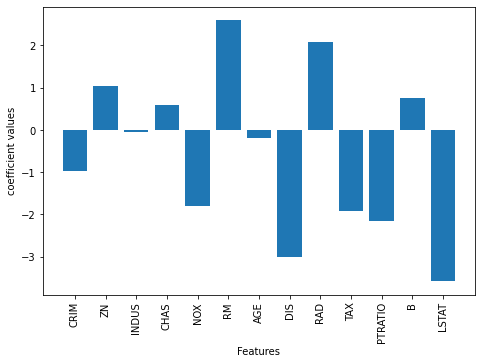

In [4]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.xticks(rotation=90)
ax.bar(labels,coef)
plt.xlabel('Features')
plt.ylabel('coefficient values')
plt.show()

In [5]:
# inverse transform the coefficients. 
coef_retransformed = scaler_features.inverse_transform(coef)
print(coef_retransformed)

[-4.59542207e+00  3.67501175e+01  1.07998820e+01  2.13426049e-01
  3.46297308e-01  8.11999044e+00  6.31499207e+01 -2.49909668e+00
  2.74359275e+01  7.25220997e+01  1.37669130e+01  4.25774325e+02
 -1.32794231e+01]


Να θυμάστε ότι οι μέθοδοι που βασίζονται σε δέντρα δεν είναι τόσο επιρρεπείς στην κλίμακα των δεδομένων μας όσο η Γραμμική παλινδρόμηση. Επομένως, δεν χρειάζεται να τυποποιήσουμε (standardize) εκ των προτέρων τα δεδομένα μας.
Ωστόσο, στο Linear Regression είναι ένα ουσιαστικό βήμα. 

## Decision Tree

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

dec_tree = DecisionTreeRegressor()

dec_tree.fit(X_train, y_train)

y_pred_test = dec_tree.predict(X_test)
y_pred_train = dec_tree.predict(X_train)

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print(r2_test)
print(r2_train)

0.6430917195051447
1.0


In [7]:
print(dec_tree.feature_importances_)

[5.35242723e-02 3.01978025e-03 1.08540174e-02 3.60326129e-04
 1.89011928e-02 2.40460972e-01 6.28458264e-03 2.98825690e-02
 2.57417458e-03 8.76053506e-03 3.11624304e-02 6.59407211e-03
 5.87621076e-01]


In [8]:
feat_imp = dec_tree.feature_importances_.tolist()
print(feat_imp)

[0.05352427226864161, 0.0030197802509562164, 0.01085401737734309, 0.00036032612898542944, 0.01890119275138139, 0.24046097188236407, 0.006284582640478094, 0.029882569004489243, 0.0025741745759237915, 0.008760535062092997, 0.031162430390963027, 0.006594072110010427, 0.5876210755563706]


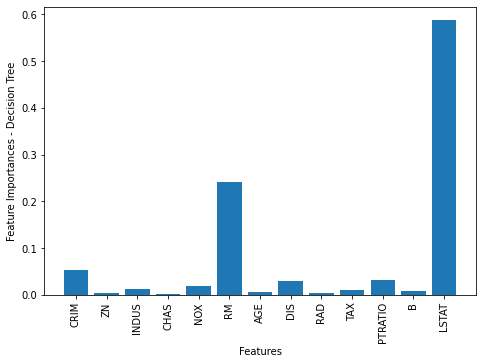

In [9]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plt.xticks(rotation=90)
ax.bar(labels,feat_imp)
plt.xlabel('Features')
plt.ylabel('Feature Importances - Decision Tree')
plt.show()

## Random Forest



In [10]:
y = np.ravel(y) # jsut to avoid a warning
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
# Instantiate Regressor, restricting n_estimators only to reduce computation time
rf_regr = RandomForestRegressor(n_estimators=50)
# Fitting the RF
rf_regr.fit(X_train, y_train)
# Test RF with test data (and training data to compare them)
y_pred_test = rf_regr.predict(X_test)
y_pred_train = rf_regr.predict(X_train)
# Calc metric (e.g. r2)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
# Print metrics
print(r2_test)
print(r2_train)

0.797053118057202
0.9789996414243541


In [11]:
rf_feat_imp = rf_regr.feature_importances_.tolist()

In [12]:
print(rf_feat_imp)

[0.03476408926471575, 0.0014231552729180607, 0.008744369836132807, 0.0010976707109911226, 0.019931849986298822, 0.45416207263052993, 0.01102771991273531, 0.034525773572196106, 0.006665268582169324, 0.017463668398967024, 0.021689000450414265, 0.011087253719817065, 0.3774181076621144]


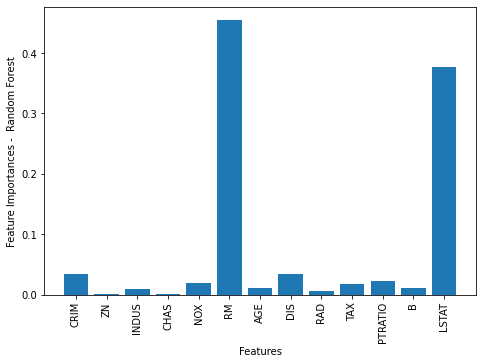

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation=90)
ax.bar(labels,rf_feat_imp)
plt.xlabel('Features')
plt.ylabel('Feature Importances -  Random Forest')
plt.show()